# Defining Our Strategy for Important Feature Visualization

In this notebook we will try to find out the most important features that are affecting the peformances of the employees. We need to separate out the least performers to the top performers.
Through clustering algorithms like KMeans we will try to cluster the features with respect to performance rating and we will see what are the top most correlated features of that cluster.

# Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.set_option('display.max_columns',None)

In [26]:
excel_file_path = '../../Data/Raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(excel_file_path).drop(['EmpNumber'],axis=1)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [27]:
df3 =df

### Label Encoding our categorical features

In [28]:
cols_to_transform = df3.select_dtypes('O').columns

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

for col in cols_to_transform:
    df3[col] = le.fit_transform(df3[col])

In [31]:
df2 = df3

In [32]:
df2.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


## Mapping Our Target Columns

In [33]:
performance_rating_mapping = {
    1: '1:Low',
    2: '2:Good',
    3: '3:Excellent',
    4: '4:Outstanding'
}

df2['PerformanceRating'] = df2['PerformanceRating'].map(performance_rating_mapping)

In [34]:
df2 = pd.get_dummies(data = df2)

# Applying Kmeans Algorithmn

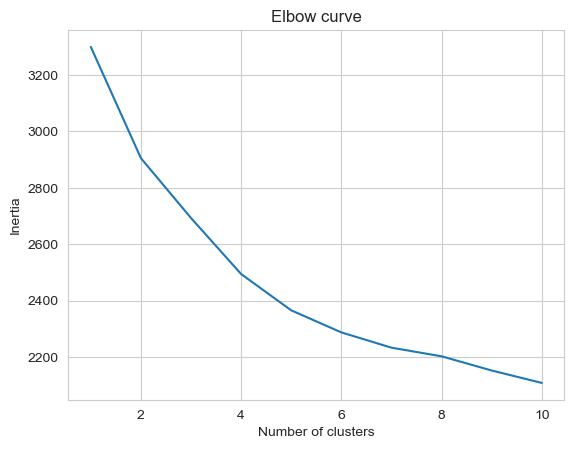

In [35]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cluster_scaled = scaler.fit_transform(df2)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()




## Finding the Best Number of Clusters

#### Using Elbow Method we chose n_cluster as 3

In [36]:
excel_file_path = '../../Data/Raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(excel_file_path).drop(['EmpNumber'],axis=1)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster_scaled)

df2['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [38]:
df2['cluster'].value_counts()

0    525
2    349
1    326
Name: cluster, dtype: int64

In [39]:
df2['PerformanceRating_2:Good'].value_counts()

0    1006
1     194
Name: PerformanceRating_2:Good, dtype: int64

Here 1 means that the employee rating is 2

In [40]:
df2[df2['cluster'] ==1]['PerformanceRating_2:Good'].value_counts()

1    194
0    132
Name: PerformanceRating_2:Good, dtype: int64

In [41]:
df2[df2['cluster'] ==0]["PerformanceRating_2:Good"].value_counts()

0    525
Name: PerformanceRating_2:Good, dtype: int64

In [42]:
df2[df2['cluster'] ==2]["PerformanceRating_2:Good"].value_counts()

0    349
Name: PerformanceRating_2:Good, dtype: int64

#### We find that in cluster 1 we have separated the least performers; performers with rating "2"

## Finding Correlation of Features With Respect to Cluster

In [43]:
df2.corr()['cluster'].sort_values()[:-1]

Gender                            -0.848589
PerformanceRating_3:Excellent     -0.106544
Attrition                         -0.038745
EmpJobRole                        -0.035270
EmpJobSatisfaction                -0.031598
EmpEnvironmentSatisfaction        -0.030017
EducationBackground               -0.027734
EmpRelationshipSatisfaction       -0.020650
EmpWorkLifeBalance                -0.014216
EmpHourlyRate                     -0.004132
OverTime                           0.001682
DistanceFromHome                   0.003055
EmpJobInvolvement                  0.009498
EmpDepartment                      0.012178
ExperienceYearsInCurrentRole       0.021769
EmpLastSalaryHikePercent           0.027665
YearsWithCurrManager               0.034854
MaritalStatus                      0.035285
BusinessTravelFrequency            0.036089
EmpEducationLevel                  0.039964
ExperienceYearsAtThisCompany       0.041758
YearsSinceLastPromotion            0.042839
Age                             

## Plotting the Correlated Features 

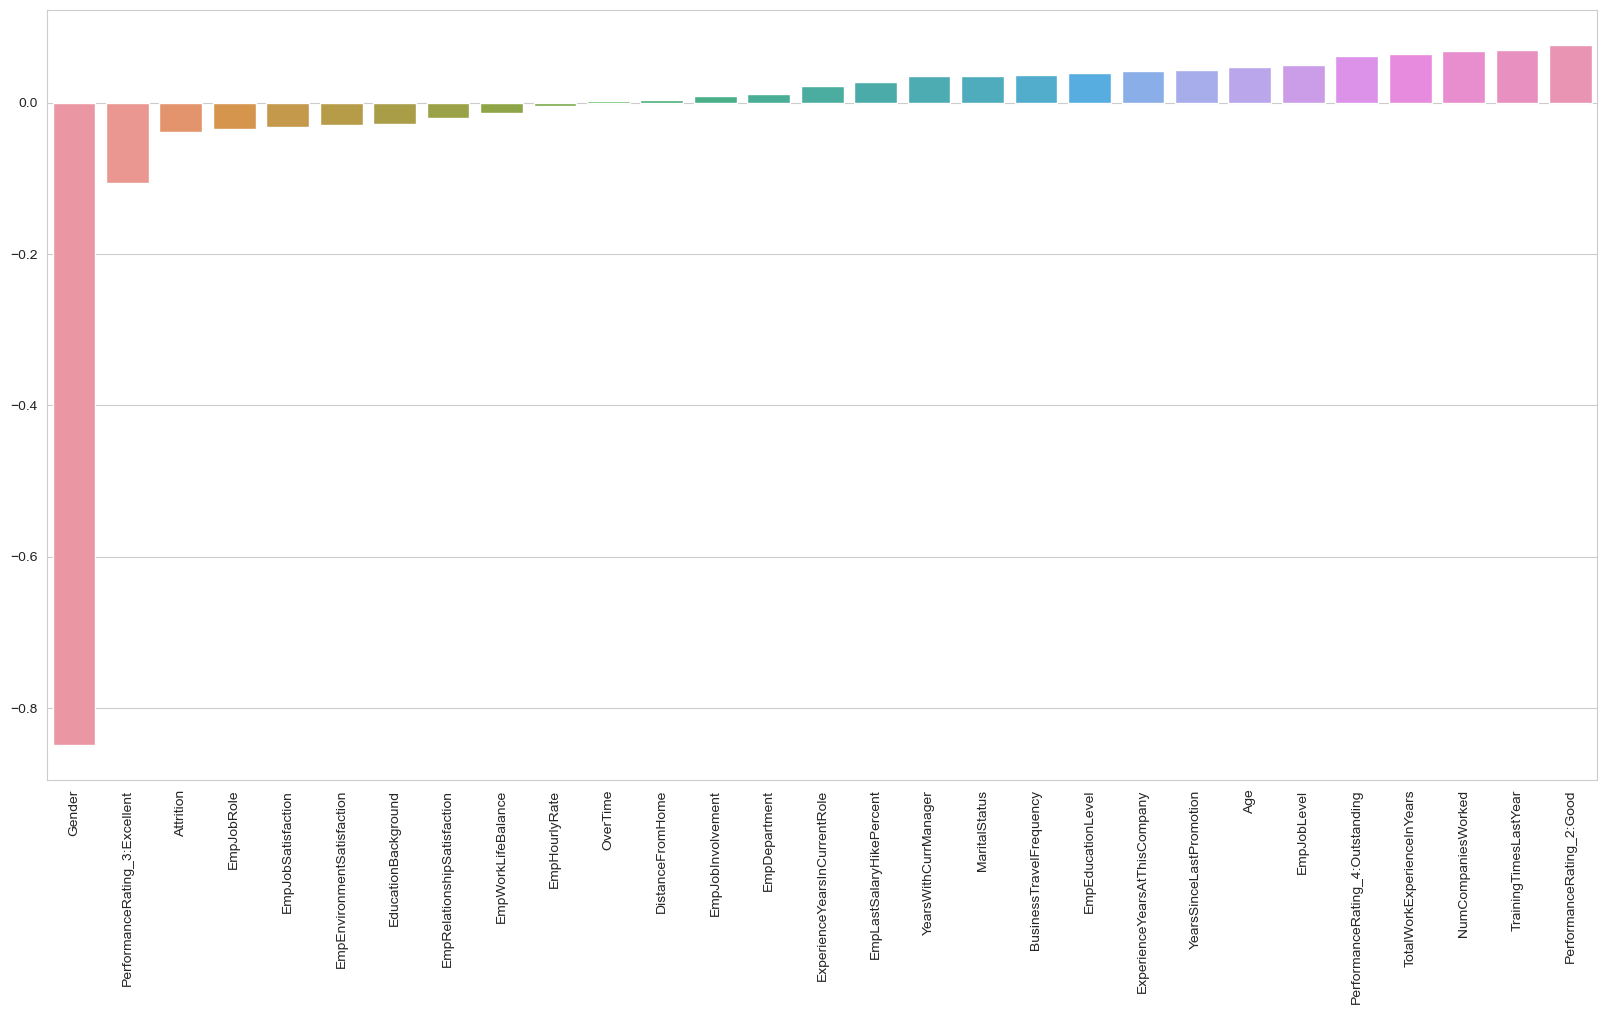

In [44]:
plt.figure(figsize = (20,10))
sns.barplot(x =df2.corr()['cluster'].sort_values()[:-1].index,y =df2.corr()['cluster'].sort_values()[:-1].values)
plt.xticks(rotation = 90);

## Plotting Correlated Features With Respect to Cluster

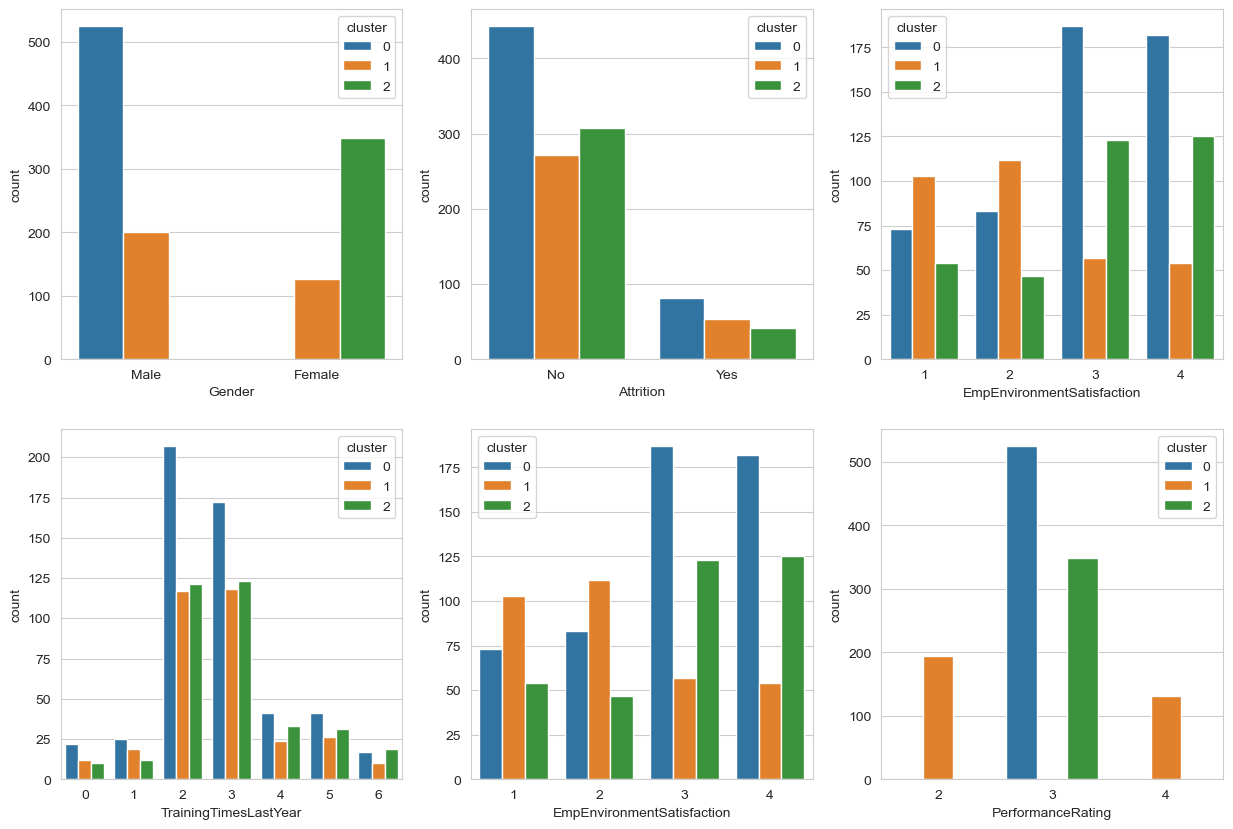

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Gender', hue='cluster')
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Attrition', hue='cluster')
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='EmpEnvironmentSatisfaction', hue='cluster')
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='TrainingTimesLastYear', hue='cluster')
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='EmpEnvironmentSatisfaction', hue='cluster')
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='PerformanceRating', hue='cluster')

plt.show()


#### We have successfully separated the top performers (rating 4) and the least performers (rating 2) in cluster 1

In [46]:
df[df['cluster']==0]['PerformanceRating'].value_counts()

3    525
Name: PerformanceRating, dtype: int64

# Top Features Affecting the Clusters

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df4 = pd.get_dummies(df, drop_first=True)

X = df4.drop(['cluster','PerformanceRating'],axis=1)
y = df4['cluster']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)[1:]

importance_df[:5]


,Feature,Importance
9,EmpLastSalaryHikePercent,0.109559
3,EmpEnvironmentSatisfaction,0.080472
16,YearsSinceLastPromotion,0.042173
4,EmpHourlyRate,0.036406
0,Age,0.031149


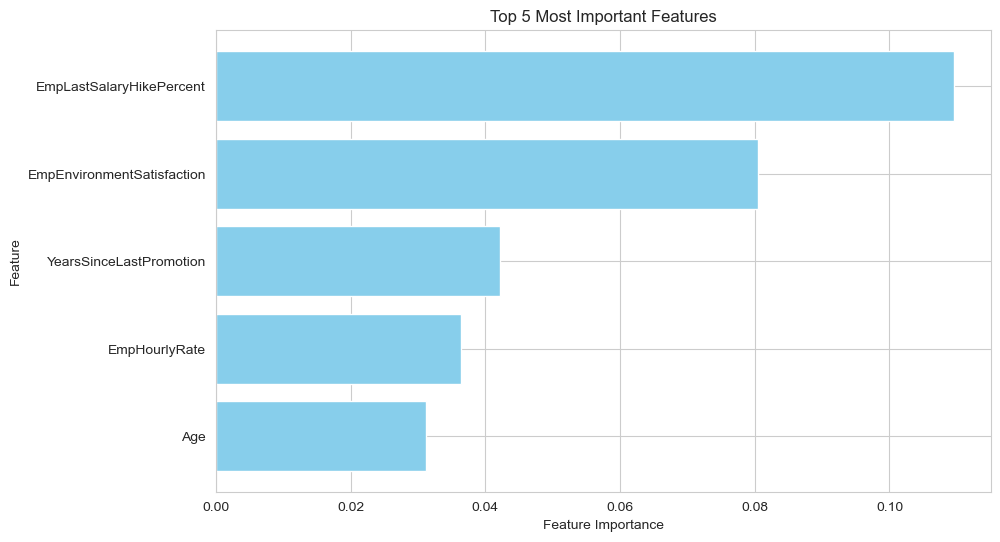

In [48]:
top_5_features = importance_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

Employee last salary hike percentage, Employee environment satisfaction,years since last promotion, Employee hourly rate and age are the top most features are affecting when we are determinig the clusters. 